# COMP2002 - Machine Learning and Optimisation Assignment
This template can be used for the weekly coding exercises, and for your coursework.

In [1]:
# Import datasets

In [2]:
import pandas as pandas

In [3]:
AffRegion1Dataset = pandas.read_csv("AlgerianFF_Region1.csv")

In [4]:
AffRegion2Dataset = pandas.read_csv("AlgerianFF_Region2.csv")

In [5]:
# Display datasets in tables

In [6]:
AffRegion1Dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [7]:
AffRegion2Dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2
1,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2
2,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1
3,4,6,2012,30,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0
4,5,6,2012,32,60,14,0.2,77.1,6.0,17.6,1.8,6.5,0.9


In [8]:
# Display all column names

In [9]:
AffRegion1Dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [10]:
AffRegion2Dataset.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI'],
      dtype='object')

In [11]:
# Retrieve and seperate inputs/targets from datasets

In [12]:
inputs_DatasetRegion1 = AffRegion1Dataset[['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI']]

In [13]:
targets_DatasetRegion1 = AffRegion1Dataset[['FWI']]

In [14]:
inputs_testRegion2 = AffRegion2Dataset[['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI']]

In [15]:
targets_testRegion2 = AffRegion2Dataset[['FWI']]

In [16]:
from sklearn import preprocessing

In [17]:
# Normalisze the data set inputs

In [18]:
from sklearn.preprocessing import MinMaxScaler 

In [19]:
scaler = MinMaxScaler()
scaled_Region1 = scaler.fit_transform(inputs_DatasetRegion1)
scaled_Region2 = scaler.fit_transform(inputs_testRegion2)

In [20]:
scaled_testdata = preprocessing.normalize([[2,6,2012,30,80,16,0.4,59.8,3.4,27.1,0.9,5.1]])

In [21]:
# Beginning of Regression Methods

In [22]:
# Random Forest Regression Method

In [23]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_absolute_error

In [24]:
RandomF_Regressor = RandomForestRegressor()
RandomF_Regressor.fit(scaled_Region1, targets_DatasetRegion1.values.ravel())

RandomForestRegressor()

In [25]:
RandonF_outputs = RandomF_Regressor.predict(scaled_Region1)
RandonForest_MAE = (mean_absolute_error(targets_DatasetRegion1, RandonF_outputs))

In [26]:
print(RandonForest_MAE)

0.22876229508196647


In [27]:
predictedOutcome = RandomF_Regressor.predict(scaled_testdata)

In [28]:
print("Outcome: " + str(predictedOutcome))

Outcome: [0.085]


In [29]:
# Random MLP Regressor Method

In [30]:
from sklearn.neural_network import MLPRegressor 

In [31]:
MLP_Regressor = MLPRegressor()

In [32]:
MLP_Regressor.fit(scaled_Region1, targets_DatasetRegion1.values.ravel()) #2000 iterations

MLPRegressor()

In [33]:
MLP_Outputs = MLP_Regressor.predict(scaled_Region1)

In [34]:
MLP_MAE = (mean_absolute_error(targets_DatasetRegion1, MLP_Outputs))

In [35]:
print(MLP_MAE)

0.25392963525600937


In [36]:
# Random Support Vector Machine Method

In [37]:
from sklearn.svm import SVR 

In [38]:
SVR_Regressor = SVR()

In [39]:
SVR_Regressor.fit(scaled_Region1, targets_DatasetRegion1.values.ravel())

SVR()

In [40]:
SVR_Outputs = SVR_Regressor.predict(scaled_Region1)

In [41]:
SVR_MAE = (mean_absolute_error(targets_DatasetRegion1, SVR_Outputs))

In [42]:
print(SVR_MAE)

0.9128863744241063


In [43]:
# Assessment of Regression - Boxplot

In [44]:
import matplotlib.pyplot as plt
import numpy as np

In [45]:
# Creating dataset

In [46]:
data = [RandonForest_MAE, MLP_MAE, SVR_MAE]

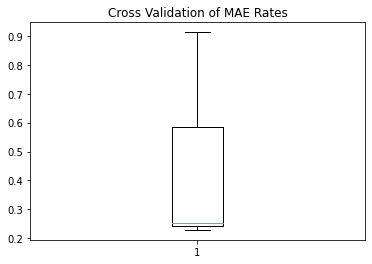

In [47]:
# Creating plot
plt.boxplot(data)
  
# Adding title 
plt.title("Cross Validation of MAE Rates")
    
# show plot
plt.show()